##### Determine which clustering solution, including number of clusters and algorithm used, is best for the marathon data. Once you have a solution you like, write a data story, including visualizations, where you teach the reader something about the Boston Marathon based on your clusters.

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

%matplotlib inline

In [2]:
df = pd.read_csv('results.csv')

In [3]:
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [4]:
df.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')

In [5]:
df.describe()

,division,age,official,genderdiv,overall,pace
count,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000,31984.000000
mean,1932.563032,42.407079,242.997314,8051.044741,15939.587825,9.275658
std,1715.228694,11.316496,52.300431,4754.005626,9232.978224,1.992486
min,1.000000,18.000000,80.600000,1.000000,1.000000,3.080000
25%,610.000000,33.000000,205.527500,3972.000000,7943.750000,7.850000
50%,1425.000000,42.000000,232.370000,7970.000000,15939.500000,8.870000
75%,2611.000000,50.000000,273.235000,11968.000000,23935.250000,10.430000
max,6979.000000,81.000000,538.880000,17575.000000,31931.000000,20.570000


In [7]:
df['ctz'].describe()

count     1244
unique      84
top        GBR
freq       171
Name: ctz, dtype: object

In [9]:
df.ctz.unique()

array([nan, 'KOR', 'MEX', 'ECU', 'CPV', 'AUS', 'CAN', 'NZL', 'ROU', 'GER',
       'DEN', 'GBR', 'FRA', 'IRL', 'JPN', 'RSA', 'ITA', 'GUA', 'ESP',
       'CHN', 'LAT', 'ARG', 'TUR', 'BRA', 'KEN', 'CRC', 'RUS', 'NED',
       'USA', 'BIH', 'PHI', 'SUI', 'SRI', 'MAR', 'SWE', 'SVK', 'VEN',
       'HUN', 'NEP', 'IND', 'PER', 'GEO', 'DOM', 'CMR', 'COL', 'NOR',
       'TRI', 'AUT', 'KSA', 'TPE', 'HKG', 'ERI', 'SLO', 'PAR', 'CZE',
       'ZIM', 'UKR', 'BEL', 'POR', 'MLT', 'MAS', 'FIN', 'ALG', 'IRI',
       'NCA', 'ETH', 'ISR', 'ISL', 'CHI', 'ESA', 'BLR', 'SIN', 'HAI',
       'POL', 'GUY', 'GRE', 'IRQ', 'BER', 'PAK', 'URU', 'UGA', 'CRO',
       'PAN', 'BAR', 'LIB'], dtype=object)

In [11]:
df.city.describe()

count      31983
unique      5934
top       Boston
freq        1034
Name: city, dtype: object

In [13]:
df = df.drop('ctz', axis=1).dropna()
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
9,30.48,"Hall, Ryan",20,77.68,M,31,137.83,6,20,112.27,20,5.27,CA,94.78,15.15,65.23,61.78,USA,Redding,129.83
14,17.12,"Cassidy, Josh R.",13,48.88,M,29,87.40,W8,13,72.83,13,3.35,ON,60.82,8.02,40.20,38.02,CAN,Port Elgin,82.38
15,33.93,"Linden, Desiree",10,85.03,F,30,143.90,F8,10,119.68,46,5.50,MI,102.40,16.92,71.68,67.92,USA,Rochester Hills,136.47
24,18.30,"Filteau, Michel",14,50.33,M,47,89.40,W13,14,74.95,14,3.42,QC,62.33,8.67,41.80,39.63,CAN,St-Jean Baptiste,84.48
27,18.78,"Kim, Gyu Dae",15,50.33,M,30,89.52,W14,15,75.02,15,3.42,IL,62.72,8.98,41.82,39.65,USA,Champaign,84.75


In [14]:
df.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', '35k', 'overall', 'pace', 'state', '30k', '5k', 'half',
       '20k', 'country', 'city', '40k'],
      dtype='object')

In [15]:
##Creating a feature set

features = df[['5k', '10k', '20k', 'half', '25k', '30k', '35k', '40k', 'pace', 'official', 'age']]

## Adding a new binary feature to identify gender

features['gender_male'] = 0
features.loc[(df['gender'] == 'M'), 'gender_male'] = 1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [16]:
## Convert objects to numeric
features = features.convert_objects(convert_numeric=True)

## Dropping NaNs
features = features.dropna()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [17]:
features.head()

,5k,10k,20k,half,25k,30k,35k,40k,pace,official,age,gender_male
9,15.15,30.48,61.78,65.23,77.68,94.78,112.27,129.83,5.27,137.83,31,1
14,8.02,17.12,38.02,40.20,48.88,60.82,72.83,82.38,3.35,87.40,29,1
15,16.92,33.93,67.92,71.68,85.03,102.40,119.68,136.47,5.50,143.90,30,0
24,8.67,18.30,39.63,41.80,50.33,62.33,74.95,84.48,3.42,89.40,47,1
27,8.98,18.78,39.65,41.82,50.33,62.72,75.02,84.75,3.42,89.52,30,1


In [18]:
## Comparing male and female paces based on age

#Some outside research tells me that old age begins at 58, let's go with that
features.loc['old_men_median'] = features[features['age'] >= 58][features['gender_male'] == 1].median()
features.loc['old_women_median'] = features[features['age'] >= 58][features['gender_male'] == 0].median()

# This same outside research tells me middle age begins at 35, uh oh, but here we go
features.loc['young_men_median'] = features[features['age'] < 35][features['gender_male'] == 1].median()
features.loc['young_women_median'] = features[features['age'] < 35][features['gender_male'] == 0].median()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [19]:
old_men_median_paces = features.loc['old_men_median'].iloc[:8].values.tolist()
old_men_median_paces_list = []
for j in old_men_median_paces:
    old_men_median_paces_list.append(j)

old_women_median_paces = features.loc['old_women_median'].iloc[:8].values.tolist()
old_women_median_paces_list = []
for j in old_women_median_paces:
    old_women_median_paces_list.append(j)
    
young_men_median_paces = features.loc['young_men_median'].iloc[:8].values.tolist()
young_men_median_paces_list = []
for j in young_men_median_paces:
    young_men_median_paces_list.append(j)

young_women_median_paces = features.loc['young_women_median'].iloc[:8].values.tolist()
young_women_median_paces_list = []
for j in young_women_median_paces:
    young_women_median_paces_list.append(j)

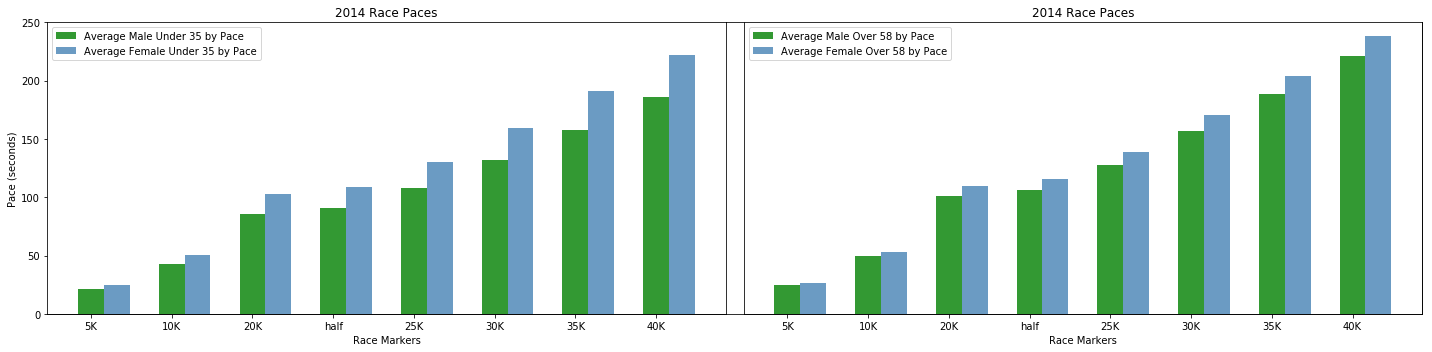

In [21]:

n_groups = 8

fig, ax = plt.subplots(figsize=(20,5))
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Comparing averages of young men and women

ax = fig.add_subplot(121)

index = np.arange(n_groups)
bar_width = 0.32
opacity = 0.8

rects1 = plt.bar(index, young_men_median_paces_list, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Average Male Under 35 by Pace')
 
rects2 = plt.bar(index + bar_width, young_women_median_paces_list, bar_width,
                 alpha=opacity,
                 color='steelblue',
                 label='Average Female Under 35 by Pace')
 
plt.xlabel('Race Markers')
plt.ylabel('Pace (seconds)')
plt.title('2014 Race Paces')
plt.yticks(np.arange(0, 260, 50))
plt.xticks(index, ('5K', '10K', '20K', 'half', '25K', '30K', '35K', '40K'))
plt.legend()

# Comparing averages of Men and Women over 58

ax = fig.add_subplot(122)
ax.axes.get_yaxis().set_visible(False)

index = np.arange(n_groups)
bar_width = 0.32
opacity = 0.8
 
rects1 = plt.bar(index, old_men_median_paces_list, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Average Male Over 58 by Pace')
 
rects2 = plt.bar(index + bar_width, old_women_median_paces_list, bar_width,
                 alpha=opacity,
                 color='steelblue',
                 label='Average Female Over 58 by Pace')
 
plt.xlabel('Race Markers')
plt.ylabel('Pace (seconds)')
plt.title('2014 Race Paces')
plt.xticks(index, ('5K', '10K', '20K', 'half', '25K', '30K', '35K', '40K'))
plt.legend()

plt.tight_layout()
plt.show()

### It appears as though difference in pace is emphasized more greatly in younger age groups.

##### I'll create training and test sets for other clustering models: Clustering gender for our younger runners

In [24]:
# divide into training and test sets
from sklearn.model_selection import train_test_split

X = features[features['age'] < 35].drop(['gender_male'], axis=1)
Y = features['gender_male'][features['age'] < 35]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.9, random_state=42)

##### Predicting gender using K-means

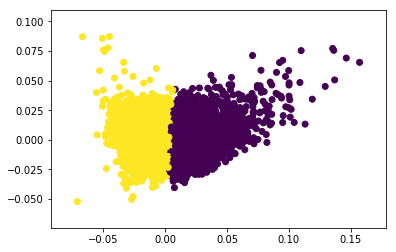

comparing k-means clusters against the data: 
gender_male   0.0   1.0
row_0                  
0            1962  1333
1            2755  2260


In [26]:
# Normalize the data first
X_norm = normalize(X)

# Reduce it to two components with PCA
X_pca = PCA(2).fit_transform(X_norm)

# Calculate the predicted values
Y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = Y_pred)
plt.show()

# Check the solution against the data
print('comparing k-means clusters against the data: ')
print(pd.crosstab(Y_pred, Y))

##### MiniBatch

In [27]:
# Each batch will be made up of 250 data points
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=250)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, Y_pred))


Comparing k-means and mini batch k-means solutions:
col_0     0     1
row_0            
0      3021     0
1       274  5015


##### Contingency Tables

In [29]:
# Get predicted clusters
full_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_norm)

pd.crosstab(Y, full_pred)

col_0,0,1
gender_male,,
0.0,1958,2759
1.0,1331,2262


##### Adjusted Rand Index

In [32]:
from sklearn import metrics

metrics.adjusted_rand_score(Y, full_pred)

-0.0006636295855050319

##### Mean-shift with PCA

In [33]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_pca, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_pca)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 5


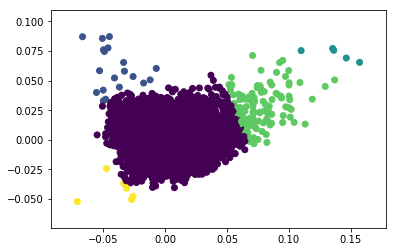

Comparing the assigned categories to the ones in the data:
col_0     0   1  2    3  4
row_0                     
0      3164   0  5  126  0
1      4990  19  0    0  6


In [35]:
# Mean-shift
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(Y_pred,labels))